# Análisis de datos. Equipo 9

#### Integrantes: 
- ##### Wendy Areli Ramírez Burgos
- ##### Gustavo Corona Ojeda
- ##### Carlos Fernando Vásquez Guerra

En los últimos años, el ejercicio profesional  de la ciencia de datos, se ha presentado como un campo de gran importancia para el crecimiento de las compañías y de la ciencia, por lo que el requerimiento de éstos perfiles ha ido en aumento, siendo una de las profesiones emergentes más importantes en los últimos 4 años;  sin embargo, aproximadamente el 9% de las vacantes disponibles quedan sin cubrir por falta de perfiles especializados, lo que contribuye a que sea una de las profesiones mejor pagadas. A éste respecto, el sueldo promedio para E,U se encuentra en los 120, 000 dólares anuales; siendo además el país con más alta demanda de científicos de datos.  En estudios anteriores se ha encontrado además, que los sueldos en primedio se encuentran por encima del promedio nacional, en países de América, Europa , Asia y América latina. Si bien los requerimientos especificados por cada empresa son diversos, el manejo de lenguajes como Python y R se mantienen como los más populares en el mercado Latinoamericano. El objetivo de ésta investigación será el de indagar a través de las herramientas de análisis de datos con Python cuáles son los requerimientos específicos, habilidades, nivel de experiencia, así como el nivel academico necesario para desarrollarse exitosamente en ciencia de datos y comprender cómo ésto se relaciona con las expectativas salariales para ayudar a la toma de decisiones respecto a objetivos profesionales en el camino STEM.

In [536]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from scipy import stats
from scipy.stats import skew, kurtosis
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import warnings

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 100)
warnings.filterwarnings("ignore")

In [55]:
jobs = pd.read_csv("DataScience_jobs.csv")

### Descripción de las variables:

+ `Puesto laboral`: Cargo ofrecido por la compañía.
+ `Empresa`: Empresa que ofrece el trabajo.
+ `Estado`: Estado donde se realizaría el trabajo.
+ `Ciudad`: Ciudad donde se realizaría el trabajo.
+ `País`: Ciudad donde se realizaría el trabajo.
+ `Salario mínimo`: Estimación oficial del salario base (mínimo) que pretende pagar el empleador por este trabajo.
+ `Salario máximo`: Estimación oficial del salario base (máximo) que pretende pagar el empleador por este trabajo.
+ `Tipo de moneda`: Moneda en la cual se encuentra la estimación del rango salarial.
+ `Descripción`: Descripción del trabajo.
+ `Giro de la empresa`: Área a la que pertenece la compañia
+ `Fecha de publicación`: Fecha en la que se publico la oferta laboral
+ `Vigencia de la oferta`: Fecha límite para aplicar a la oferta laboral
+ `Modalidad`: Tipo de trabajo ('OTHER', 'FULL_TIME', 'PART_TIME', 'CONTRACTOR').
+ `Esquema de pago`: Periodo en que se contabiliza el trabajo (por hora, diario, semanal, mensual, anual o no se especifica)
+ `Cantidad de lenguajes requeridos`: Número de lenguajes de programación requeridos/deseables en la oferta laboral.
+ `Nivel de experiencia`: Tipo de puesto a cubrir (Not specified, Junior, Senior, free level, SemiSr)
+ `Requerimiento educación`: Variable que indica si se requiere algún nivel educativo para el puesto.
+ `Salario promedio`: Salario promedio estimado

In [56]:
jobs.head()

,Puesto laboral,Empresa,Estado,Ciudad,Salario mínimo,Salario máximo,Tipo de moneda,Descripción,Giro de la empresa,Fecha de publicación,Vigencia de la oferta,Modalidad,País,Esquema de pago,Cantidad de lenguajes requeridos,Nivel de experiencia,Requerimiento educación,Salario promedio
0,Data Engineer with Azure Synapse,4urHires INC,not specified,not specified,8800.000000,9600.000000,USD,Azure EngineerStrong experience in SynapseJob ...,not specified,2022-09-16,2022-10-16,OTHER,EUA,hour,2,Not specified,0,9200.000000
1,Data Engineer,MARS Group,not specified,not specified,6348.800000,9600.000000,USD,Description: Data is a critical driver of this...,not specified,2022-09-14,2022-10-16,FULL_TIME,EUA,hour,8,Not specified,1,7974.400000
2,Data Engineer - ENTRY LEVEL,PCS Global Tech,California,Los Angeles,5000.000000,5833.333333,USD,Responsibilities· Analyze and organize raw dat...,Tecnologías de la información,2022-09-15,2022-10-16,FULL_TIME,EUA,year,5,Junior,1,5416.666667
3,Entry-Level Azure Data Engineer,"Antra, Inc",not specified,not specified,5166.666667,5833.333333,USD,"About usAntra, Inc is a leading IT consultancy...",Tecnologías de la información,2022-09-13,2022-10-16,FULL_TIME,EUA,year,10,Junior,1,5500.000000
4,Data Engineer only for OPT EAD,CloudBig Technology,not specified,not specified,8000.000000,9600.000000,USD,Work with Technical and business team to under...,not specified,2022-09-15,2022-10-16,FULL_TIME,EUA,hour,3,Not specified,1,8800.000000


In [57]:
#Identifica las columnas de tu dataset que tengan datos numéricos
cuali_var = ["Puesto laboral", "Empresa", "Estado", "Ciudad", "Tipo de moneda", "Descripción", "Giro de la empresa", "Fecha de publicación", "Vigencia de la oferta", "Modalidad", "País", "Nivel de experiencia", "Requerimiento educación"]
cuanti_var = ["Cantidad de lenguajes requeridos", "Salario mínimo", "Salario máximo", "Salario promedio"]

In [138]:
#Identifica las columnas de tu dataset que tengan datos numéricos
#Obtén los siguientes estimados de tus columnas numéricas:
#Promedio
#Mediana
#Media Truncada
#Desviación estándar
#Rango
#Percentiles 25 y 75 (por lo menos)
#Rango intercuartil

for c in cuanti_var:
    print("Variable: ", c)
    print("Promedio: ",jobs[c].mean())
    print("Mediana: ",jobs[c].median())
    print("Media truncada: ",stats.trim_mean(jobs[c][[False if i else True for i in jobs[c].isna()]], .10))
    print("Desviación estándar", jobs[c].std())
    print("Rango", jobs[c].max()-jobs[c].min())
    print("Percentiles:")
    for p in range(11):
        print(f'{p*10}%:', jobs[c].quantile(p/10))
    print("Rango intercuantil: ",jobs[c].quantile(.75) - jobs[c].quantile(.25))
    print("Asimetía: ", skew(jobs[c][[False if i else True for i in jobs[c].isna()]]))
    print("Curtosis: ", kurtosis(jobs[c][[False if i else True for i in jobs[c].isna()]]))
    print()

Variable:  Cantidad de lenguajes requeridos
Promedio:  4.205128205128205
Mediana:  4.0
Media truncada:  3.9181494661921707
Desviación estándar 2.2269460990120957
Rango 12
Percentiles:
0%: 1.0
10%: 2.0
20%: 2.0
30%: 3.0
40%: 3.0
50%: 4.0
60%: 4.0
70%: 5.0
80%: 6.0
90%: 7.0
100%: 13.0
Rango intercuantil:  2.0
Asimetía:  1.1272176419626125
Curtosis:  1.1846428869012398

Variable:  Salario mínimo
Promedio:  3332.141070435093
Mediana:  1750.0
Media truncada:  2603.1782870617944
Desviación estándar 4240.527711390807
Rango 49942.95
Percentiles:
0%: 294.3
10%: 575.0
20%: 750.0
30%: 895.0
40%: 1200.0
50%: 1750.0
60%: 2812.5
70%: 4000.0
80%: 5416.666666666667
90%: 7983.333333333333
100%: 50237.25
Rango intercuantil:  3887.5
Asimetía:  4.767875028073054
Curtosis:  37.782391593080064

Variable:  Salario máximo
Promedio:  5728.12480104753
Mediana:  3000.0
Media truncada:  3790.4758601678377
Desviación estándar 24067.19597129823
Rango 544322.8
Percentiles:
0%: 500.0
10%: 750.0
20%: 950.0
30%: 1226.4

El conjunto de datos con el cual se está trabajando, contiene con 4 variables numéricas: `Cantidad de lenguajes requeridos`, `Salario mínimo`, `Salario máximo`, `Salario promedio` y, gracias a los estimados de locación y variabilidad podemos decir lo siguiente

+ En promedio, las empresas buscan entre 2 y 6 lenguajes de programación en sus postulantes. En particular, un 60% de las empresas buscan un promedio de 4 lenguajes o habilidades de programación.
+ Las variables de salario mínimo y máximo existen porque, generalmente, en las ofertas laborales se presenta un rango salarial, en el caso del salario mínimo, podemos ver que existen puesto desde 293.4 dolares (\$5,886 pesos mexicanos), los cuales pueden corresponder a los salarios otorgados por los programas de becas. Considerando el 90\% de los datos más representativos, se tienen salarios alrededor de 2,603 dolares aumentando o disminuyendo, en promedio, 4,241 dolares.
+ En general, el salario máximo en los trabajos relacionados a la ciencia de datos, se puede esperar hasta 5728 dolares (más de 100 mil pesos)
+ En promedio, se puede contemplar 3,000 dolares como el salario en algún trabajo relacionado a la ciencia de datos (60,000 pesos) aunque se debe considerar 11,233 dolares de desviación estandar, por lo que existe una alta variabilidad en los salarios promedios.

+ Por otro lado, la variablidad de los salarios se puede explicar por la alta diversidad de los distintos puestos, que van desde un sistema de becas hasta puestos Senior. Tomemos de ejemplo las siguientes gráficas que correponden al salario promedio. 
    - En la primera gráfica podemos ver como la alta presencia de valores extremos (en este caso los salarios más altos) afecta radicalmente a la distribución de la variable haciendo que tenga una cola pesada hacia la derecha. Tomando el 90\% de la información, podemos ver de una mejor manera el comportamiento de la variable.
    - Independientemente de las sub gráficas, la distribución de esta variable es asimétrica positiva, ya que podemos visualizar que existen muchos salarios que sobre pasan al salario donde se acumula el 50\% de la información (2,000), y leptocúrtica, lo cual indica la presencia de valores extremos nuevamente. 
    - Este comportamiento es similar para el resto de las variables relacionadas al salario

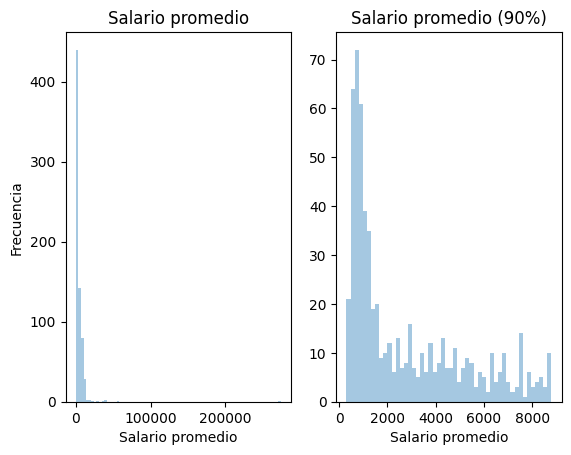

In [121]:
fig, ax = plt.subplots(1, 2)
sns.distplot(jobs["Salario promedio"], kde=False, norm_hist=False, bins=80, ax = ax[0]).set(title='Salario promedio', ylabel='Frecuencia')
sns.distplot(jobs[jobs["Salario promedio"] <= jobs["Salario promedio"].quantile(9/10)]["Salario promedio"], kde=False, norm_hist=False, bins=50, ax = ax[1]).set(title='Salario promedio (90%)')
plt.show()

El problema de los valores atípicos se presenta en cada una de las variables relacionadas al salario. Véase los siguientes gráficos (box-plots) donde se puede visualizar el peso que tienen dichos valores en la distribución de nuestras variables 

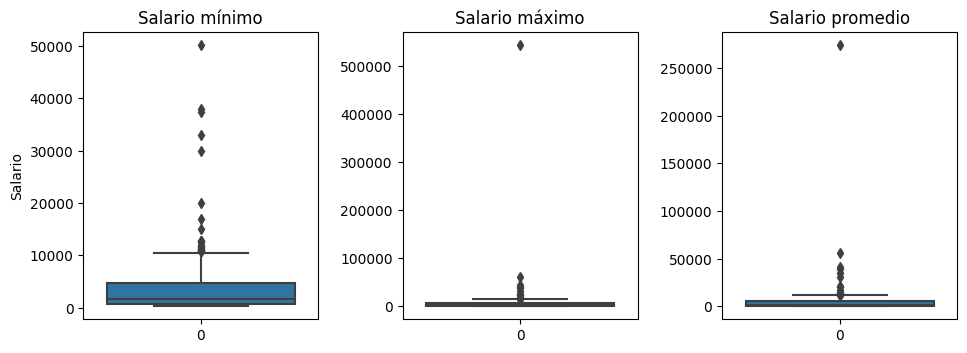

In [540]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))
fig.tight_layout(pad=3)
sns.boxplot(jobs["Salario mínimo"], ax = ax[0]).set(title='Salario mínimo', ylabel='Salario')
sns.boxplot(jobs["Salario máximo"], ax = ax[1]).set(title='Salario máximo')
sns.boxplot(jobs["Salario promedio"], ax = ax[2]).set(title='Salario promedio')
plt.show()

Eliminando los valores atítpicos con el rango intercuantílico, las distribuciones de nuestras variables tienen un comportamiendo menos caótico, manteniendo una distribución asimétrica y leptocúrtica.

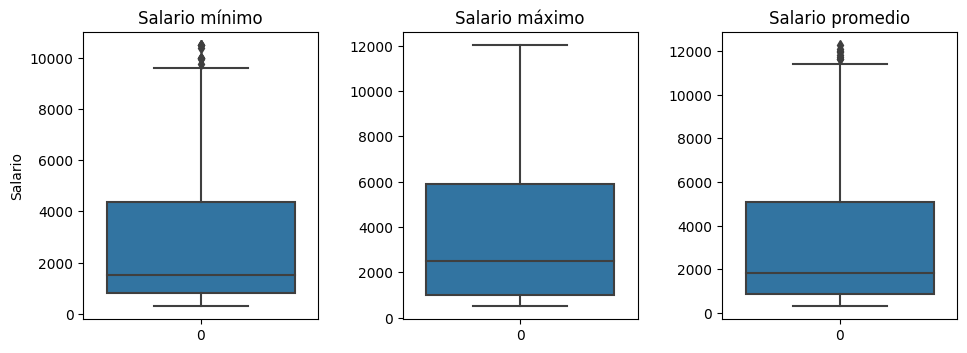

In [541]:
iqr_max = jobs['Salario mínimo'].quantile(0.75) - jobs['Salario mínimo'].quantile(0.25)
iqr_min = jobs['Salario máximo'].quantile(0.75) - jobs['Salario máximo'].quantile(0.25)
iqr_mean = jobs['Salario promedio'].quantile(0.75) - jobs['Salario promedio'].quantile(0.25)

f_inf_min = jobs['Salario mínimo'] > jobs['Salario mínimo'].quantile(0.25) - (iqr_max * 1.5)
f_sup_min = jobs['Salario mínimo'] < jobs['Salario mínimo'].quantile(0.75) + (iqr_max * 1.5)

f_inf_max = jobs['Salario máximo'] > jobs['Salario máximo'].quantile(0.25) - (iqr_max * 1.5)
f_sup_max = jobs['Salario máximo'] < jobs['Salario máximo'].quantile(0.75) + (iqr_max * 1.5)

f_inf_mean = jobs['Salario promedio'] > jobs['Salario promedio'].quantile(0.25) - (iqr_mean * 1.5)
f_sup_mean = jobs['Salario promedio'] < jobs['Salario promedio'].quantile(0.75) + (iqr_mean * 1.5)

jobs_min_outlier = jobs[f_inf_min & f_sup_min].copy()
jobs_max_outlier = jobs[f_inf_max & f_sup_max].copy()
jobs_mean_outlier = jobs[f_inf_mean & f_sup_mean].copy()

fig, ax = plt.subplots(1, 3, figsize=(10,4))
fig.tight_layout(pad=3)
sns.boxplot(jobs_min_outlier["Salario mínimo"], ax = ax[0]).set(title='Salario mínimo', ylabel='Salario')
sns.boxplot(jobs_max_outlier["Salario máximo"], ax = ax[1]).set(title='Salario máximo')
sns.boxplot(jobs_mean_outlier["Salario promedio"], ax = ax[2]).set(title='Salario promedio')
plt.show()

Respecto a la variable del número de lenguajes de programación, tenemos una distribución más estable por la poca presencia de valores extremos que podemos visualizar en las siguientes gráficas. Además, de no tener colas tan pesadas, por el boxplot, podemos notar que la distribución es simétrica cuando se considera solo rango intercuantílico, tal como ya lo mostraban nuestros estimados de locación y variabilidad (media = 4, mediana = 4.0, media truncada = 4 y desviación estándar = 2.23) y la propia asimetría (1.1). Considerando la asimetría y la curtosis (1.2), esta variable tiene un comportamiento no muy alejado de la normal.

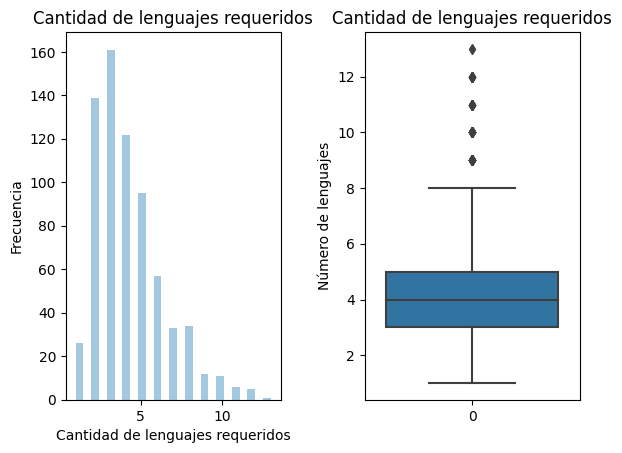

In [134]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=3)
sns.distplot(jobs["Cantidad de lenguajes requeridos"], kde=False, norm_hist=False, bins = 25, ax = ax[0]).set(title='Cantidad de lenguajes requeridos', ylabel='Frecuencia')
sns.boxplot(jobs["Cantidad de lenguajes requeridos"], ax = ax[1]).set(title="Cantidad de lenguajes requeridos", ylabel='Número de lenguajes')
plt.show()

La variable que tiene mayor interes para el estudio, es la variable del salario promedio, por lo que es pertinente explorar un poco más el comportamiento de esta variable con todas las restantes (las gráficas no considerarán los valores extremos para evitar que el ruido de la información no permita ver el comportamiento relevante de los datos).

Respecto al país, podemos apreciar que la mayoría de los trabajos en nuesto conjunto de datos se encuentran en México, aunque son aquellos con una menor paga en dolares. Por otra parte podemos ver que la curtosis de los salario promedio de Canada y Estados Unidos son muy altas comparada con la de México. Esto hace ver la brecha salarial entre los países, aunque siempre hay que considerar que el costo de vida cambia de acuerdo al país y los salarios se ajustan a dicho costo.

Otro punto de vista es otorgado con los violin plots, ya que es más notoria la brecha salarial por país, donde Estados Unidos tiene las ofertas salariales más diversas y grandes y Canada con la mayoría de sus salarios arriba de los respectivos en México

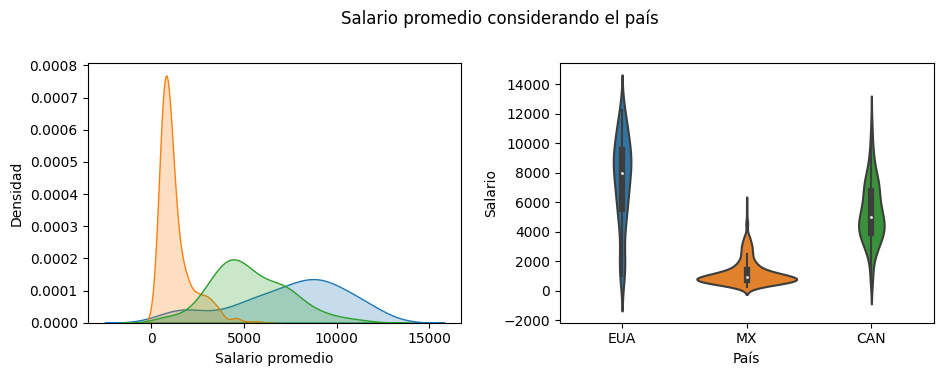

In [542]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad=4)
for m in jobs_mean_outlier["País"].unique():
    aux_d = jobs_mean_outlier[jobs_mean_outlier["País"] == m]["Salario promedio"]
    sns.distplot(aux_d, hist = False, kde_kws = {'shade': True}, ax = ax[0]).set(ylabel='Densidad')
#plt.legend(labels=['Otro','Tiempo completo', "Tiempo parcial", "Contratista"], loc='center right')
sns.violinplot(jobs_mean_outlier, y = "Salario promedio", x="País", ax = ax[1]).set(ylabel='Salario')
fig.suptitle('Salario promedio considerando el país') 
plt.show()

Por otra parte, la mayoría de los empleos son de tiempo completo aunque con salario no tan altos. Además, en aquellos trabajos que son de tiempo parcial se puede notar dos salarios predominantes, al rededor de salarios bajos y salarios cercanos a 5000 dolares mensuales.

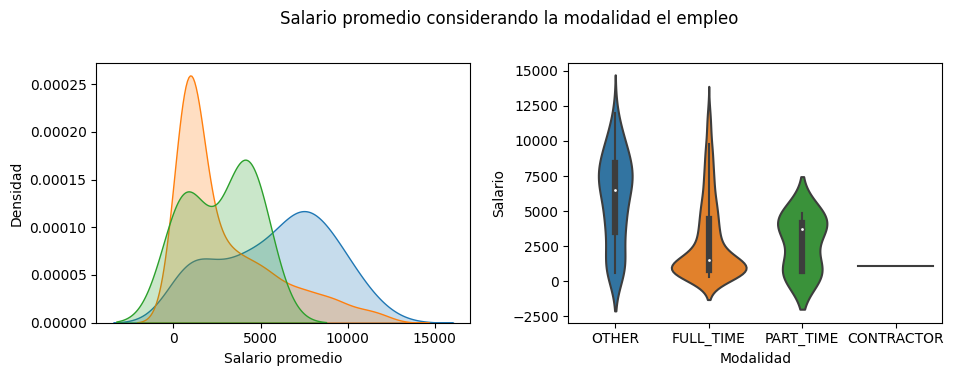

In [543]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad=4)
for m in jobs_mean_outlier["Modalidad"].unique():
    aux_d = jobs_mean_outlier[jobs_mean_outlier["Modalidad"] == m]["Salario promedio"]
    sns.distplot(aux_d, hist = False, kde_kws = {'shade': True}, ax = ax[0]).set(ylabel='Densidad')
#fig.legend(labels=['Otro','Tiempo completo', "Tiempo parcial", "Contratista"], loc='upper left')
sns.violinplot(jobs_mean_outlier, y = "Salario promedio", x="Modalidad", ax = ax[1]).set(ylabel='Salario')
fig.suptitle('Salario promedio considerando la modalidad el empleo') 
plt.show()

Un aspecto interesante es el comportamiento del salario respecto a si la oferta laboral nos indica si se requiere algún grado educativo en específico. Como podemos ver en la siguiente gráfica, muchos empleadores deciden no describir algún tipo de grado escolar requerido en este tipo de empleos aunque, si hablamos del salario, este factor parece no influír en el salario ofrecido 

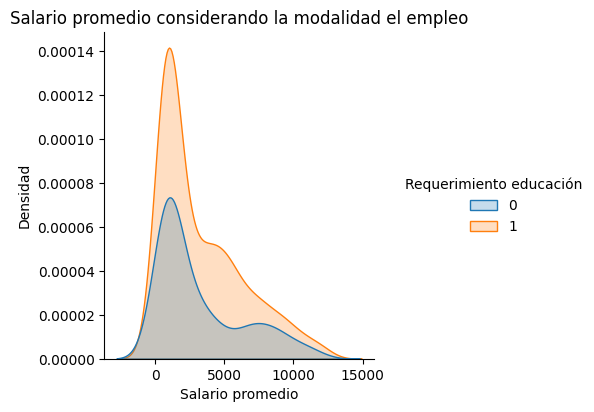

In [544]:
sns.displot(jobs_mean_outlier, x = "Salario promedio", hue="Requerimiento educación", kind="kde", fill=True, height=4).set(title='Salario promedio considerando la modalidad el empleo', ylabel='Densidad')
plt.show()

Considerando la variable que determina el tipo de puesto que las empresas están buscando (Junio, Senior, etc), es fácil de entender por que el nivel Senior tiene los salarios más altos aunque, podemos observar, que también estos salarios pueden estar cerca de los salarios otorgados para un nivel Junior.

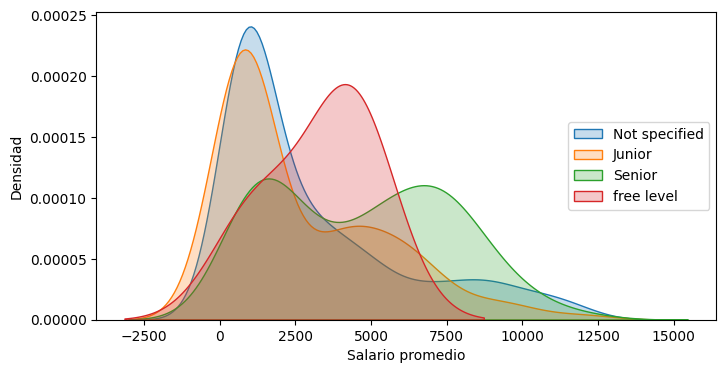

In [233]:
plt.figure(figsize=(8, 4))
for m in jobs_mean_outlier["Nivel de experiencia"].unique():
    aux_d = jobs_mean_outlier[jobs_mean_outlier["Nivel de experiencia"] == m]["Salario promedio"]
    sns.distplot(aux_d, hist = False, kde_kws = {'shade': True}).set(ylabel='Densidad')
plt.legend(labels=list(jobs_mean_outlier["Nivel de experiencia"].unique()), loc='center right')
plt.show()

Sabemos que México es el país donde peores salarios podemos encontrar para estos trabajos, seguido por Canada y Estados Unidos, aunque, para alguién que busca un nivel Junio, México es una buena opción como se puede ver en la siguiente tabla de contingencia. Por otra parte Canada tiene una gran cantidad de puestos en los que solicitan, específicamente, a alguien que cubra un puesto como Senior.

In [322]:
pd.crosstab(jobs['Nivel de experiencia'], jobs['País'], margins=True, margins_name='total')

País,CAN,EUA,MX,total
Nivel de experiencia,,,,
Junior,22,23,59,104
Not specified,95,92,294,481
Senior,59,5,50,114
free level,2,0,1,3
total,178,120,404,702


Respecto a lo anterior, una representación visual ayuda mucho para ver la distribución del tipo de trabajo solicitado. De esta gráfica, podemos ver que la cantidad de trabajos donde se requerie especificamente un puesto Junior a cubrir, tiene igual demanda que los puestos Senior. Lo cual deja ver la clara oportunidad para cualquier persona que se dedique a la ciencia de datos.

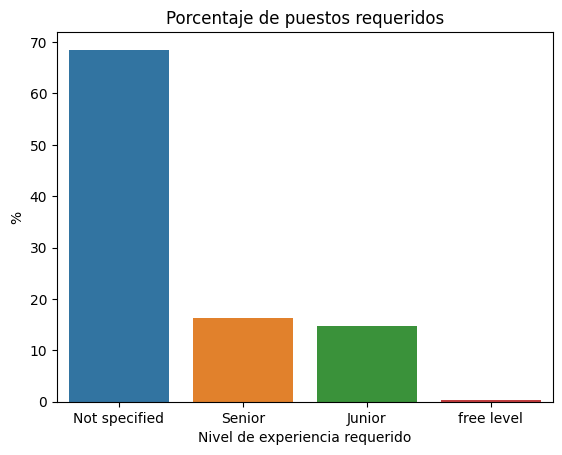

In [323]:
experience_percent = (jobs['Nivel de experiencia'].value_counts()) * 100/ len(jobs)
ax = sns.barplot(y = experience_percent, x = experience_percent.index)
ax.set_title('Porcentaje de puestos requeridos')
ax.set(xlabel='Nivel de experiencia requerido', ylabel = "%");

Ya que México tiene la mayoría de ofertas laborles en este conjunto de datos, sería de gran interes ver las ciudades más mencionadas (el top 5) por país. Por la siguiente gráfica, podemos ver que es más probable encontrar una oferta laboral en la Ciudad de México, en Toronto respecto a Canada y en San Francisco en Estados Unidos.

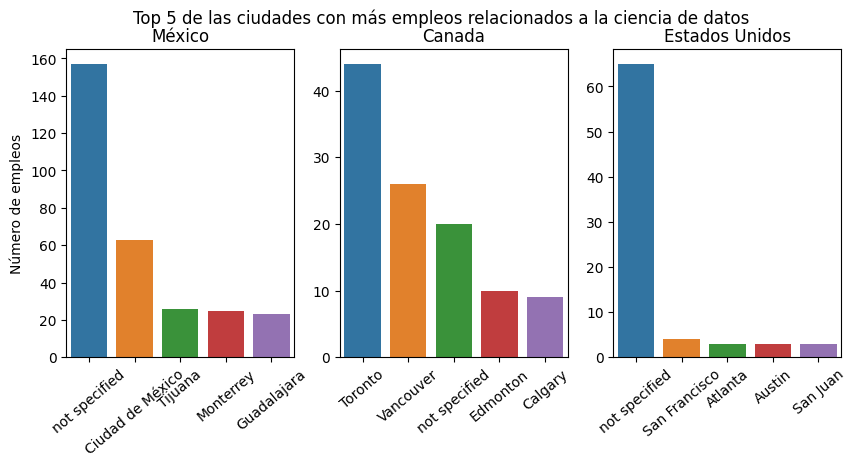

In [545]:
city_count_MX = jobs[jobs['País'] == "MX"]["Ciudad"].value_counts()[0:5]
city_count_EU = jobs[jobs['País'] == "EUA"]["Ciudad"].value_counts()[0:5]
city_count_CD = jobs[jobs['País'] == "CAN"]["Ciudad"].value_counts()[0:5]

fig, axes = plt.subplots(1, 3, figsize=(10,4))

ax = sns.barplot(y = city_count_MX, x = city_count_MX.index, ax=axes[0])
ax.set_title('México')
ax.set(xlabel='', ylabel = "Número de empleos");
ax.set_xticklabels(ax.get_xticklabels(), rotation=40);

ax = sns.barplot(y = city_count_CD, x = city_count_CD.index, ax=axes[1])
ax.set_title('Canada')
ax.set(xlabel='', ylabel = "");
ax.set_xticklabels(ax.get_xticklabels(), rotation=40);

ax = sns.barplot(y = city_count_EU, x = city_count_EU.index, ax = axes[2])
ax.set_title('Estados Unidos')
ax.set(xlabel='', ylabel = "");
ax.set_xticklabels(ax.get_xticklabels(), rotation=40);

fig.suptitle('Top 5 de las ciudades con más empleos relacionados a la ciencia de datos') 

plt.show()

Finalmente, la existe una mayor probabilidad de encontrar una oferta laboral donde soliciten tener algún tipo de educación en los tres países y para cualquier puesto

In [330]:
(
    pd.crosstab(jobs_mean_outlier['País'], 
                [jobs_mean_outlier['Requerimiento educación'], 
                 jobs_mean_outlier['Nivel de experiencia']]).stack(level=0)
)

Nivel de experiencia          Junior  Not specified  Senior  free level
País Requerimiento educación                                           
CAN  0                             4             19      13           1
     1                            18             73      43           1
EUA  0                             5             38       1           0
     1                            17             43       2           0
MX   0                            23            110      20           0
     1                            36            183      29           1

-------------

En este caso en específico, se tienen pocas variables numéricas aunque esto no impide realizar un análisis de correlación.

Existen claras relaciones lineales entre el salario promedio y las restantes variables consideras, en especial el salario mínimo; ya que, tanto el salario máximo y mínimo fueron utilizadas para la creación de dicha variable. Por otra parte, el salario promedio tiene muy poca relacion lineal con la cantidad de lenguajes solicitados en el trabajo

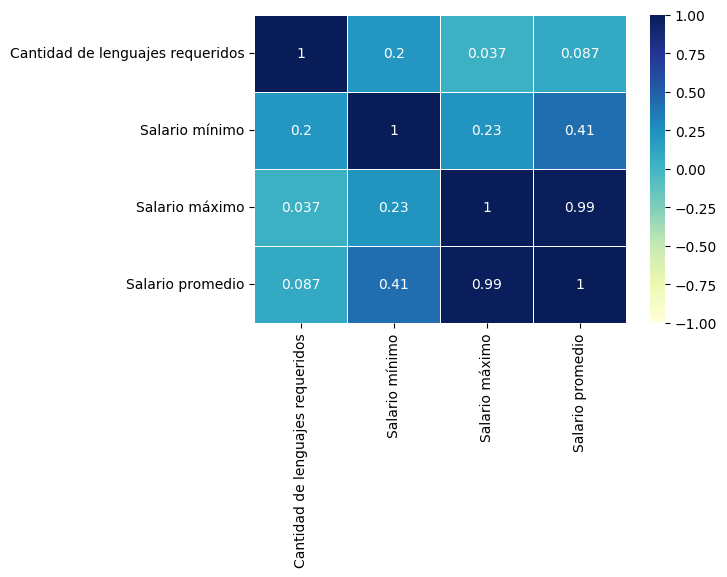

In [358]:
plt.figure(figsize=(6, 4))
ax = sns.heatmap(jobs[cuanti_var].corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Ya que el coeficiente de correlación de pearson es muy sensible a datos atípicos, consideraremos los datos que solo toman en cuenta el rango intercuantílico del salario promedio.

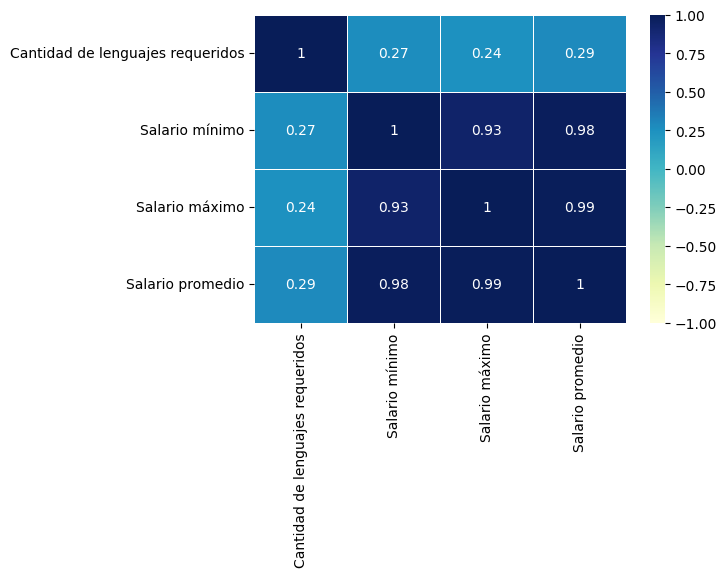

In [359]:
plt.figure(figsize=(6, 4))
ax = sns.heatmap(jobs_mean_outlier[cuanti_var].corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Como podemos apreciar, tanto el salario mínimo y máximo estan altamente correlacionados con el salario promedio, lo cual es evidente por construcción. El punto importante aquí, fue que al remover valores atípicos, ambas variables consiguen mostrar su fuerte relación con el promedio de una mejor manera que cuando se consideraban los valores atípicos

En el siguiente gráfico, podemos ver dichas relaciones lineales positivas y la poca linealidad que se consigue con el número de lenguajes requeridos en los gráficos de dispersión correspondientes

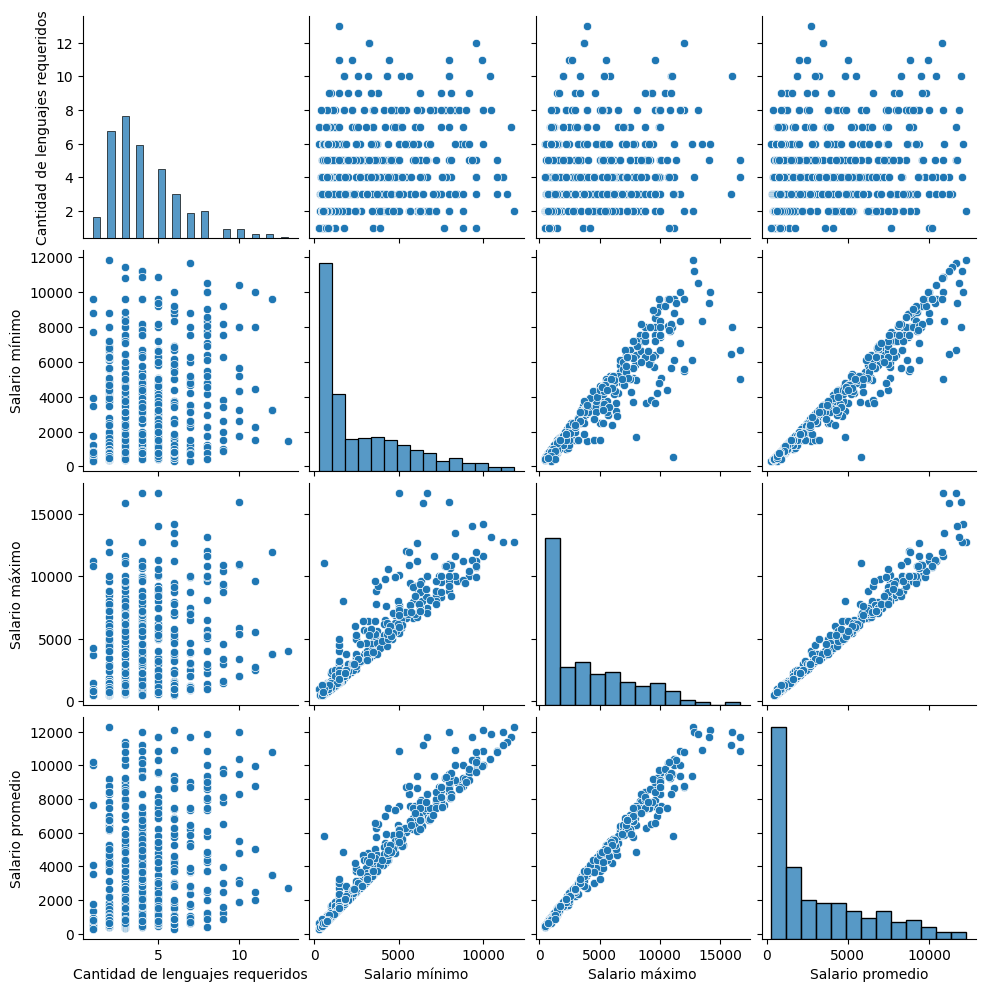

In [360]:
sns.pairplot(jobs_mean_outlier[cuanti_var]);

Ya que nuestro interes es tomar otras variables que no estén ligadas directamente con el salario (es decir, el rango salarial), no consideramos pertinente tomar en cuenta dichas variables para modelar el salario mínimo. Por el momento, y a manera de práctica, mostramos los resultados de una regresión lineal simple con el salario mínimo.

In [376]:
lr = LinearRegression() #Creamos una instancia del modelo

jobs_mean_WO = jobs_mean_outlier[[False if i else True for i in jobs_mean_outlier["Salario mínimo"].isna()]].copy()

lr.fit(jobs_mean_WO["Salario mínimo"].to_frame(), 
       jobs_mean_WO["Salario promedio"]) #Ajustamos los datos

y_predict = lr.predict(jobs_mean_WO["Salario mínimo"].to_frame()) #Predecimos los valores

Ajustando el modelo, podemos ver la clara relación lineal que genera el modelo

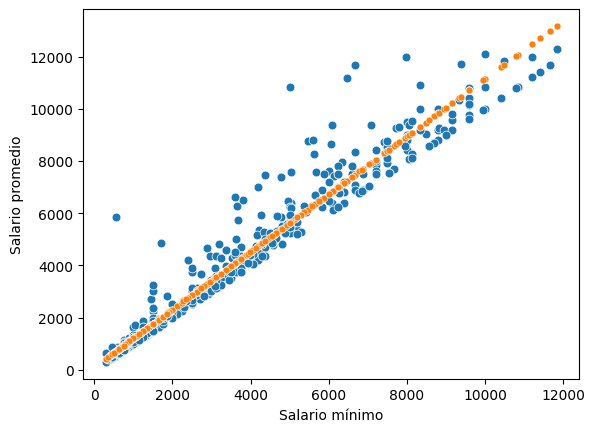

In [380]:
sns.scatterplot(x = jobs_mean_WO["Salario mínimo"], y = jobs_mean_WO["Salario promedio"], s=40);
sns.scatterplot(x = jobs_mean_WO["Salario mínimo"], y = y_predict, s=25);

Y finalmente, podemos ver que nuestro modelo quedaría expresado por la siguiente relación:

$$
\mbox{Salario promedio}= 1.1 \times \mbox{Salario mínimo} + 95.36
$$

Es decir, que por cada unidad del salario mínimo que sea publicada en la oferta laboral, el salario promedio aumentará 1.1 dolares (esperaríamos que el salario otorgado por el empleador sea mayor que el mínimo publicado) y, en caso de que este no se publique, podemos esperar, en promedio 95.36 dolares. Recordemos, además, que el salario más bajo en el conjunto de datos, en el salario mínimo, es de 294.3 dolares; sumado al 95.36, el salario más bajo que podemos esperar entre estas ofertas laborales es de 7,800 pesos

Este modelo logra capturar el 96% de toda varianza contenida en el salario promedio, lo cual muestra la eficacia que tiene este modelo para predecir el salario.

In [381]:
print(f'y = {lr.coef_[0]} * x + {lr.intercept_}')
print(f'R2: {lr.score(jobs_mean_WO["Salario mínimo"].to_frame(), jobs_mean_WO["Salario promedio"])}')

y = 1.1051259742430386 * x + 95.36339207553192
R2: 0.955690536525068


----------

Ya que es de vital importancia determinar que tan bien formada fue nuestra muestra, realizamos boostraping en las 4 variables numéricas con las que contamos para determinar la incertidumbre de nuestras estadísticas de posición y variabilidad

In [386]:
Salary_min_means = []
Salary_min_stds = []

for i in range(100_000):
    sample = jobs_mean_outlier["Salario mínimo"].sample(n=50, replace=True)
    Salary_min_means.append(sample.mean())
    Salary_min_stds.append(sample.std())

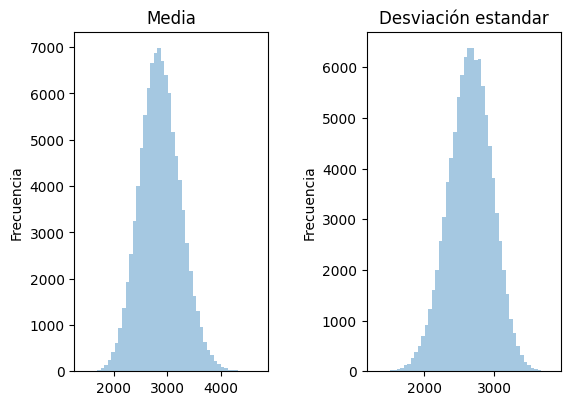

In [389]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=4)
sns.distplot(pd.Series(Salary_min_means), kde=False, norm_hist=False, ax = ax[0]).set(title='Media', ylabel='Frecuencia')
sns.distplot(pd.Series(Salary_min_stds), kde=False, norm_hist=False, ax = ax[1]).set(title='Desviación estandar', ylabel='Frecuencia')
plt.show()

Como se puede aprenciar en las gráficas anteriores, nuestra media y desviación estandar, al considerar los datos que no toman en cuenta los valores extremos respecto al salario promedio, se comportan de manera adecuada, esto también lo podemos comprobar con la curtosis y la simetría, las cuales son cercanas a cero indicando una gran similitud con la distribución normal.

In [411]:
print("Distribuciones muestral de la media:")
print("Asimetria: ", skew(Salary_min_means))
print("Curtosis: ", kurtosis(Salary_min_means)) 
print("Distribuciones muestral de la desviación estandar:")
print("Asimetría: ", skew(Salary_min_stds))
print("Curtosis: ", kurtosis(Salary_min_stds))

Salary_min_means = pd.Series(Salary_min_means)
Salary_min_stds = pd.Series(Salary_min_stds)

limite_inferior_mean = Salary_min_means.quantile(0.025)
limite_superior_mean = Salary_min_means.quantile(0.975)
limite_inferior_std = Salary_min_stds.quantile(0.025)
limite_superior_std = Salary_min_stds.quantile(0.975)

mean_of_intervals_mean = ((jobs_mean_outlier["Salario mínimo"].mean() - limite_inferior_mean) + (limite_superior_mean - jobs_mean_outlier["Salario mínimo"].mean())) / 2
mean_of_intervals_std = ((jobs_mean_outlier["Salario mínimo"].std() - limite_inferior_std) + (limite_superior_std - jobs_mean_outlier["Salario mínimo"].std())) / 2

print(f'Intervalo de 95% confianza de la media: {jobs_mean_outlier["Salario mínimo"].mean()} +/- {mean_of_intervals_mean}')
print(f'Intervalo de 95% confianza de la desviación estandar: {jobs_mean_outlier["Salario mínimo"].std()} +/- {mean_of_intervals_std}')

Distribuciones muestral de la media:
Asimetria:  0.1683171033683536
Curtosis:  0.017862035396391196
Distribuciones muestral de la desviación estandar:
Asimetría:  -0.14636098297205316
Curtosis:  -0.015348468053937303
Intervalo de 95% confianza de la media: 2865.634472815415 +/- 737.6884180299746
Intervalo de 95% confianza de la desviación estandar: 2674.772682827877 +/- 607.0624364440271


Por otra parte, nuestro intervalo de confianza de la media nos indica que podemos esperar, con un 95% de probabilidad, que al tomar una nueva muestra de los salarios, nuestro salario promedio rondaría entre 2,128 y 3,604 dolares. Respecto a la desviación estandar, esta rondaría entre 2,068 y 3,282 dolares

Este comportamiento se reproduce para el resto de las variables relacionadas al Salario

In [396]:
Salary_max_means = []
Salary_max_stds = []

for i in range(100_000):
    sample = jobs_mean_outlier["Salario máximo"].sample(n=50, replace=True)
    Salary_max_means.append(sample.mean())
    Salary_max_stds.append(sample.std())

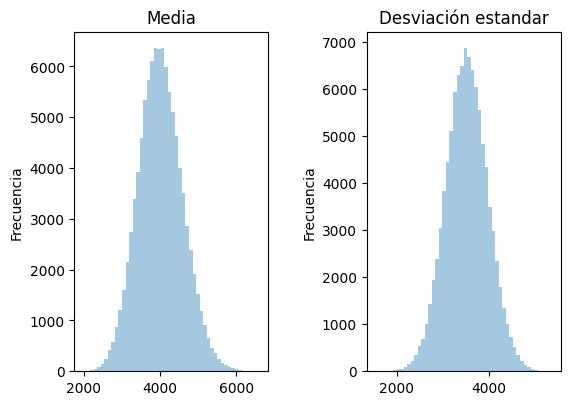

In [397]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=4)
sns.distplot(pd.Series(Salary_max_means), kde=False, norm_hist=False, ax = ax[0]).set(title='Media', ylabel='Frecuencia')
sns.distplot(pd.Series(Salary_max_stds), kde=False, norm_hist=False, ax = ax[1]).set(title='Desviación estandar', ylabel='Frecuencia')
plt.show()

In [412]:
print("Distribuciones muestral de la media:")
print("Asimetria: ", skew(Salary_max_means))
print("Curtosis: ", kurtosis(Salary_max_means)) 
print("Distribuciones muestral de la desviación estandar:")
print("Asimetría: ", skew(Salary_max_stds))
print("Curtosis: ", kurtosis(Salary_max_stds))

Salary_max_means = pd.Series(Salary_max_means)
Salary_max_stds = pd.Series(Salary_max_stds)

limite_inferior_mean = Salary_max_means.quantile(0.025)
limite_superior_mean = Salary_max_means.quantile(0.975)
limite_inferior_std = Salary_max_stds.quantile(0.025)
limite_superior_std = Salary_max_stds.quantile(0.975)

mean_of_intervals_mean = ((jobs_mean_outlier["Salario mínimo"].mean() - limite_inferior_mean) + (limite_superior_mean - jobs_mean_outlier["Salario mínimo"].mean())) / 2
mean_of_intervals_std = ((jobs_mean_outlier["Salario mínimo"].std() - limite_inferior_std) + (limite_superior_std - jobs_mean_outlier["Salario mínimo"].std())) / 2

print(f'Intervalo de 95% confianza de la media: {jobs_mean_outlier["Salario mínimo"].mean()} +/- {mean_of_intervals_mean}')
print(f'Intervalo de 95% confianza de la desviación estandar: {jobs_mean_outlier["Salario mínimo"].std()} +/- {mean_of_intervals_std}')

Distribuciones muestral de la media:
Asimetria:  0.18529271627392208
Curtosis:  0.03575084706398979
Distribuciones muestral de la desviación estandar:
Asimetría:  0.020266862875800273
Curtosis:  0.009830826443112173
Intervalo de 95% confianza de la media: 2865.634472815415 +/- 1136.7450697331224
Intervalo de 95% confianza de la desviación estandar: 2674.772682827877 +/- 884.5817537100197


In [398]:
Salary_mean_means = []
Salary_mean_stds = []

for i in range(100_000):
    sample = jobs_mean_outlier["Salario promedio"].sample(n=50, replace=True)
    Salary_mean_means.append(sample.mean())
    Salary_mean_stds.append(sample.std())

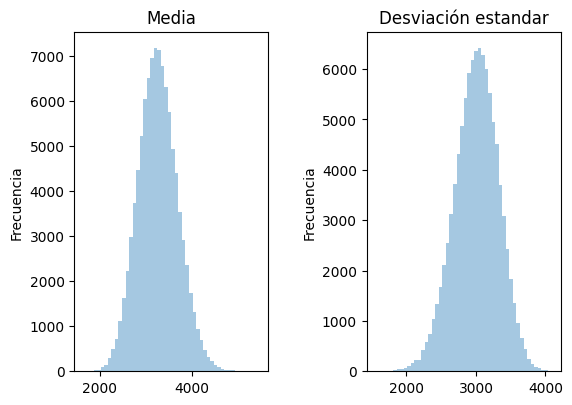

In [399]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=4)
sns.distplot(pd.Series(Salary_mean_means), kde=False, norm_hist=False, ax = ax[0]).set(title='Media', ylabel='Frecuencia')
sns.distplot(pd.Series(Salary_mean_stds), kde=False, norm_hist=False, ax = ax[1]).set(title='Desviación estandar', ylabel='Frecuencia')
plt.show()

In [413]:
print("Distribuciones muestral de la media:")
print("Asimetria: ", skew(Salary_mean_means))
print("Curtosis: ", kurtosis(Salary_mean_means)) 
print("Distribuciones muestral de la desviación estandar:")
print("Asimetría: ", skew(Salary_mean_stds))
print("Curtosis: ", kurtosis(Salary_mean_stds))

Salary_mean_means = pd.Series(Salary_mean_means)
Salary_mean_stds = pd.Series(Salary_mean_stds)

limite_inferior_mean = Salary_mean_means.quantile(0.025)
limite_superior_mean = Salary_mean_means.quantile(0.975)
limite_inferior_std = Salary_mean_stds.quantile(0.025)
limite_superior_std = Salary_mean_stds.quantile(0.975)

mean_of_intervals_mean = ((jobs_mean_outlier["Salario mínimo"].mean() - limite_inferior_mean) + (limite_superior_mean - jobs_mean_outlier["Salario mínimo"].mean())) / 2
mean_of_intervals_std = ((jobs_mean_outlier["Salario mínimo"].std() - limite_inferior_std) + (limite_superior_std - jobs_mean_outlier["Salario mínimo"].std())) / 2

print(f'Intervalo de 95% confianza de la media: {jobs_mean_outlier["Salario mínimo"].mean()} +/- {mean_of_intervals_mean}')
print(f'Intervalo de 95% confianza de la desviación estandar: {jobs_mean_outlier["Salario mínimo"].std()} +/- {mean_of_intervals_std}')

Distribuciones muestral de la media:
Asimetria:  0.1540888282996706
Curtosis:  0.004224385090297655
Distribuciones muestral de la desviación estandar:
Asimetría:  -0.21244627638200375
Curtosis:  0.05165227963852903
Intervalo de 95% confianza de la media: 2865.634472815415 +/- 831.9125598124999
Intervalo de 95% confianza de la desviación estandar: 2674.772682827877 +/- 616.9158731843991


Por otra parte, respecto a la cantidad de lenguajes requeridos se tienen buenos comportamientos respecto a la media y al valor promedio de nuestra muestra. En este caso, podemos esperar con un 95% de probabilidad, que al tomar una nueva muestra, la cantidad de lenguajes requeridos promedio rondaría entre 3.5 y 4.8 lenguajes de programación. Respecto a la desviación estandar, esta rondaría entre 1.7 y 2.8

In [400]:
RL_means = []
RL_stds = []

for i in range(100_000):
    sample = jobs_mean_outlier["Cantidad de lenguajes requeridos"].sample(n=50, replace=True)
    RL_means.append(sample.mean())
    RL_stds.append(sample.std())

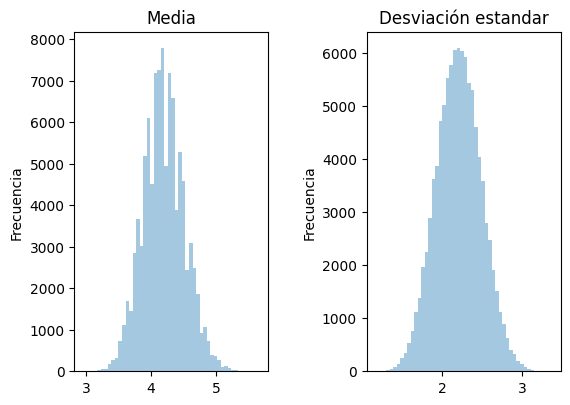

In [401]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=4)
sns.distplot(pd.Series(RL_means), kde=False, norm_hist=False, ax = ax[0]).set(title='Media', ylabel='Frecuencia')
sns.distplot(pd.Series(RL_stds), kde=False, norm_hist=False, ax = ax[1]).set(title='Desviación estandar', ylabel='Frecuencia')
plt.show()

In [415]:
print("Distribuciones muestral de la media:")
print("Asimetria: ", skew(RL_means))
print("Curtosis: ", kurtosis(RL_means)) 
print("Distribuciones muestral de la desviación estandar:")
print("Asimetría: ", skew(RL_stds))
print("Curtosis: ", kurtosis(RL_stds))

RL_means = pd.Series(RL_means)
RL_stds = pd.Series(RL_stds)

limite_inferior_mean = RL_means.quantile(0.025)
limite_superior_mean = RL_means.quantile(0.975)
limite_inferior_std = RL_stds.quantile(0.025)
limite_superior_std = RL_stds.quantile(0.975)

mean_of_intervals_mean = ((jobs_mean_outlier["Cantidad de lenguajes requeridos"].mean() - limite_inferior_mean) + (limite_superior_mean - jobs_mean_outlier["Cantidad de lenguajes requeridos"].mean())) / 2
mean_of_intervals_std = ((jobs_mean_outlier["Cantidad de lenguajes requeridos"].std() - limite_inferior_std) + (limite_superior_std - jobs_mean_outlier["Cantidad de lenguajes requeridos"].std())) / 2

print(f'Intervalo de 95% confianza de la media: {jobs_mean_outlier["Cantidad de lenguajes requeridos"].mean()} +/- {mean_of_intervals_mean}')
print(f'Intervalo de 95% confianza de la desviación estandar: {jobs_mean_outlier["Cantidad de lenguajes requeridos"].std()} +/- {mean_of_intervals_std}')

Distribuciones muestral de la media:
Asimetria:  0.1526683882196233
Curtosis:  0.00828585884608568
Distribuciones muestral de la desviación estandar:
Asimetría:  0.038696695505352784
Curtosis:  -0.13030463069039744
Intervalo de 95% confianza de la media: 4.1911764705882355 +/- 0.6100000000000001
Intervalo de 95% confianza de la desviación estandar: 2.228859796482572 +/- 0.5499298700884432


Ya que nuestro modelo de regresión simple obtuve buenas métricas ($R^2$ alto), vale la pena ver si otras variables pueden aportar mayor eficacia a nuestro modelo. En este caso utilizaremos la técnica de validación cruzada ya que es una forma más adecuada de trabajar que solo con una separación del conjunto de datos en conjunto de entrenamiento y validación.

In [428]:
X = jobs_mean_outlier[['Cantidad de lenguajes requeridos', 'Salario mínimo', 'Salario máximo']].fillna(0)
y = jobs_mean_outlier['Salario promedio']

lr = LinearRegression()
scores = cross_validate(lr, X, y, scoring='r2')

In [429]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.953 +/- 0.035


Véase que este resultado es muy bueno y mejor que el comparado con el de la regresión lineal, ya que aquí se está separando los datos para validar después el modelo con datos que no fueron utilizados para validar

En nuestro conjunto de datos, tenemos una variable con la descripción completa del trabajo ofrecido; de hecho, de esta se obtuvieron algunas variables iniciales. Por ejemplo, se hizo uso de expresiones regulares para obtener el nivel que requerían los empleadores

In [434]:
jobs["Puesto laboral"].str.findall("Junior|Jr|Senior|Sr|Trainee|ENTRY.*LEVEL|Semi.*Sr", flags= re.I)

0                 []
1                 []
2      [ENTRY LEVEL]
3      [Entry-Level]
4                 []
           ...      
697             [Sr]
698             [Sr]
699             [Sr]
700             [Sr]
701         [Senior]
Name: Puesto laboral, Length: 702, dtype: object

Para extraer el identificador que determina si se solicita algún grado escolar o no

In [440]:
jobs["Descripción"][jobs["Descripción"].str.contains("Degree|Bachelor|licenciatura|Posgrado|Carrera|Grado|Educaci[ó|o]n|Education|Estudios|Studies", flags=re.I)]

1      Description: Data is a critical driver of this...
2      Responsibilities· Analyze and organize raw dat...
3      About usAntra, Inc is a leading IT consultancy...
4      Work with Technical and business team to under...
9      HiThis is regarding to a position of an ETL Da...
                             ...                        
694    Your Opportunity:\nIf you are passionate about...
695    Posting Title\nISL 27R - Senior Programmer Ana...
698    The Opportunity: Business/Systems Infr/Cloud A...
700    Job Description : Our Client is looking for a ...
701    \n4+ years of professional software developmen...
Name: Descripción, Length: 461, dtype: object

Y para obtener el rango salarial:

In [441]:
jobs["Descripción"].str.findall(r'(\$\d+[\.\,]\d+[\.\,]*\d*)', flags=re.I)

0                                   [$55.00, $60.00]
1                                   [$39.68, $60.00]
2                           [$60,000.00, $70,000.00]
3                           [$62,000.00, $70,000.00]
4                                   [$50.00, $60.00]
                           ...                      
697                                 [$50.00, $70.00]
698                                 [$80.00, $90.00]
699    [$100,000.00, $70.00, $85.00, $70.00, $75.00]
700                         [$69,996.08, $90,000.00]
701                             [$168,100, $227,400]
Name: Descripción, Length: 702, dtype: object

Para lo siguiente, vamos a limpiar un poco todos los textos y hacer un poco de procesamiento de lenguaje natural

In [442]:
Desc_laborales = jobs["Descripción"].copy()

Desc_laborales = Desc_laborales.str.replace(",|\.|\;|\:|\+|·", " ", regex=True)
Desc_laborales = Desc_laborales.str.lower()
Desc_laborales = Desc_laborales.str.strip()
Desc_laborales = Desc_laborales.str.replace('[^\w\s]', '')
Desc_laborales = Desc_laborales.str.replace('\d', '')
Desc_laborales = Desc_laborales.str.replace('\\n', '')
Desc_laborales = Desc_laborales.dropna()

In [444]:
# Separamos cada oración en palabras
tokenized = Desc_laborales.apply(nltk.word_tokenize)
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: azure engineerstrong experience in synapsejob type contractsalary per...>

Por ejemplo, podemos entender que la mayoría de textos relacionados con "python" son relalcionados con los lenguajes de programación que se solicitan. Entre estos podemos notar C, JavaScript, Go, Scala, etc. o su nivel de experiencia sobre este

In [446]:
text.concordance('Python', lines=20)

Displaying 20 of 212 matches:
 programming languages e g java and python handson experience with sql databas
d for data operations including sql python scala and r experience working with
 the first contract year experience python year preferredwork location remote 
datasets using presto hive etc good python programming experienceexperience wi
data migration patternsknowledge in python c is mandatoryjob type fulltimepay 
echnical skills solid background in python and sql bi tools knowledge big data
rogramming languages langjava scala python r cc golang experience building dat
 programming languages e g java and python handson experience with sql databas
n officeduration long termlanguages python c net ansible playbook and yaml bas
ent in modern programming languages python java with experience and opensource
e or relateddiscipline intermediate python experience in data processing is a 
e fulltimesalary per hourexperience python years requiredsql optimization year
uestions what is your 

De hecho, podemos ver que, en contextos similares, podemos ver algunos lenguajes de programación adicionales o usos para python; por ejemplo SQL, R, Java, SAS, Excel, Tableau, Spark, etc.

In [447]:
text.similar('Python')

sql r experience java sas data databases net excel tableau software
spark business design performance c internal large statistics
developing


Independientemente de todos los términos que pueden estar relacionados a la ciencia de datos, es importante ver la mayoría de palabras que se encuentran en nuestras descripciones

In [468]:
all_words = tokenized.sum()
english_stop_words = stopwords.words('english')
spanish_stop_words = stopwords.words('spanish')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
all_words_except_stop_words = [word for word in all_words_except_stop_words if word not in spanish_stop_words]
freq_dist = nltk.FreqDist(all_words_except_stop_words)

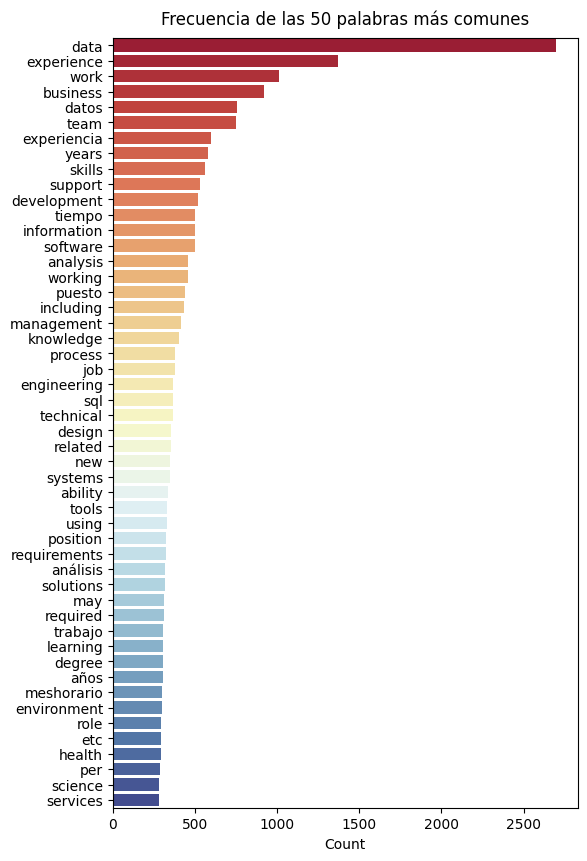

In [490]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(y = most_common_50[:, 0], x= [eval(i) for i in list(most_common_50[:, 1])], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

La gráfica anterior nos confirma el buen contenido de las descripciones, ya que, entre las palabras más comunes encontramos muchos términos con la ciencia de datos (data, datos, development, software, knowledge, SQL, tools, Análisis, solutions, learning, etc.) y sobre lo que buscan los trabajos (experience, work, business, team, experiencia, years, skills, management, enginerring, etc.).
De hecho, una nube de palabras nos mostrara que las descripciones, efectivamente, tienen términos relacionados con los requerimientos laborales y lo que buscan las empresas de un cientifico de datos.

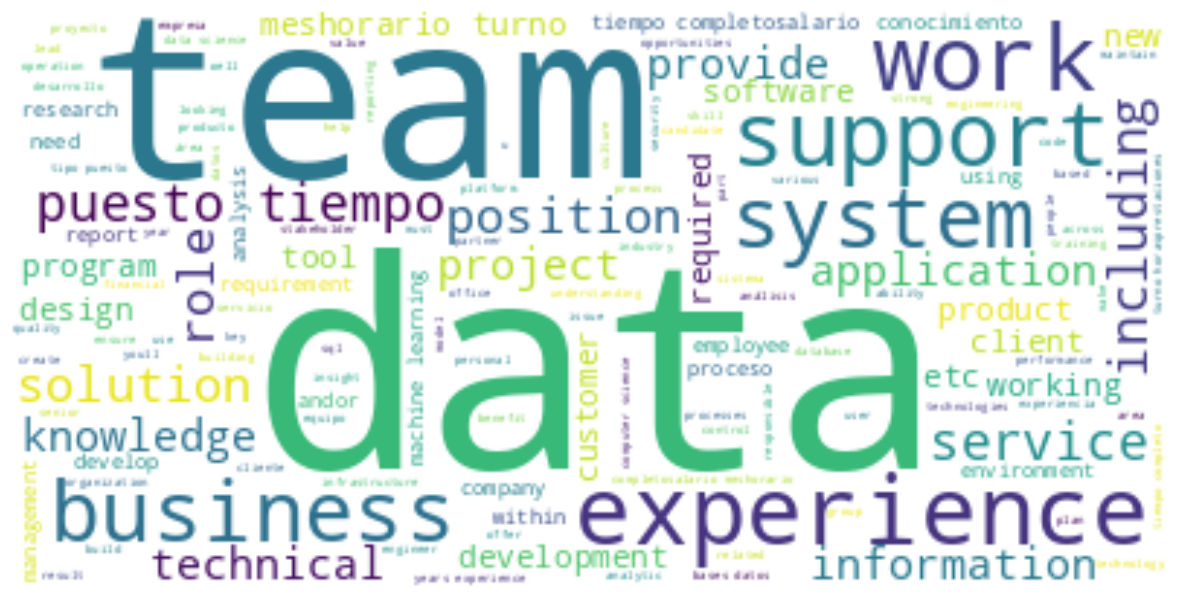

In [492]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

--------

Como ejemplo práctico, realizaremos un ejercicio de regresión logística con nuestro conjunto de datos, esto para tratar de modelar si el puesto esta diseñado para un puesto denominado como Junior o como Senior (por lo mismo, solo consideraremos aquellos registros donde se tengan dichas descripciones)

In [521]:
just_JS = jobs[(jobs["Nivel de experiencia"] == "Senior") | (jobs["Nivel de experiencia"] == "Junior")].copy()
just_JS.reset_index(inplace=True, drop = False)
#1: Senior, 0: Junior
just_JS["Nivel de experiencia"] = just_JS["Nivel de experiencia"].map(lambda x: 0 if x == "Junior" else 1)
just_JS.head(1)

,index,Puesto laboral,Empresa,Estado,Ciudad,Salario mínimo,Salario máximo,Tipo de moneda,Descripción,Giro de la empresa,Fecha de publicación,Vigencia de la oferta,Modalidad,País,Esquema de pago,Cantidad de lenguajes requeridos,Nivel de experiencia,Requerimiento educación,Salario promedio
0,2,Data Engineer - ENTRY LEVEL,PCS Global Tech,California,Los Angeles,5000.0,5833.333333,USD,Responsibilities· Analyze and organize raw dat...,Tecnologías de la información,2022-09-15,2022-10-16,FULL_TIME,EUA,year,5,0,1,5416.666667


Si consideramos todas nuestras variables numéricas (el número de lenguajes requeridos y todas las variables relacionadas al salario), obtenemos un exactitud promedio de 0.69, lo cual no es el mejor resultado para un buen clasificador

In [531]:
X = just_JS[cuanti_var].fillna(0)
y = just_JS["Nivel de experiencia"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.696969696969697

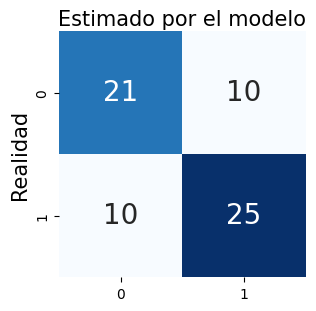

In [532]:
class_names=[0,1]
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

La anterior métrica nos da una evaluación sobre nuestro modelo de regresión para tratar de determinar si, de acuerdo a los rangos salariales, el salario promedio y el número de lenguajes de programación requeridos, un puesto será clasificado como Senior o Junior. Si bien es cierto que nuestro modelo no obtene la mejor exactitud (es decir, cuantas clasifico correctamente), podemos tomar otras métricas más especificas que pueden cumplir distintos propósitos.

Tomando el caso de la precisión, se predijeron el 71% de los puestos Senior como Senior (los casos positivos), y 67% en los casos Junior (los negativos).

In [533]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7142857142857143
Exactitud: 0.696969696969697
Sensibilidad: 0.7142857142857143
Especificidad: 0.6774193548387096


In [538]:
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

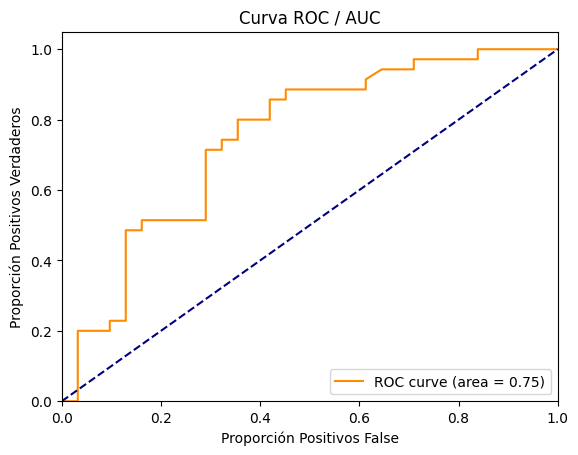

In [539]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Finalmente, mediante la curva ROC y el AUC = 0.75, podemos visualizar que nuestro modelo predice a las observaciones Senior y Junior de una manera aceptable